# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [43]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
diabet_df = pd.read_csv('./diabetes.csv')
diabet_df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [3]:
diabet_df.shape

(4303, 18)

In [4]:
diabet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

In [5]:
diabet_df.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
count,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000,4303.000000
mean,48.085057,1.351615,24.123923,123.219382,76.360446,5.226368,4.860753,1.588476,1.666765,2.976220,26.754810,4.841088,71.557080,5.729084,3.006123,3.209935,0.061585,0.302812
std,14.686155,0.477530,3.397294,17.513858,11.004056,0.781089,0.925377,1.260003,1.079377,0.892196,22.279922,1.251566,16.937394,1.424568,1.199571,0.939842,0.240428,0.459528
min,22.000000,1.000000,15.600000,72.000000,45.000000,1.780000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,4.860753,3.200000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,1.000000,21.700000,111.000000,69.000000,4.700000,4.200000,0.860000,1.130000,2.350000,14.300000,3.960000,60.000000,4.900000,3.000000,3.000000,0.000000,0.000000
50%,46.000000,1.000000,24.000000,122.000000,76.000000,5.140000,4.790000,1.280000,1.340000,2.820000,20.500000,4.760000,72.000000,5.300000,3.000000,3.000000,0.000000,0.000000
75%,59.000000,2.000000,26.300000,134.000000,83.000000,5.700000,5.430000,1.940000,1.610000,3.420000,31.050000,5.570000,82.300000,6.020000,3.000000,3.000000,0.000000,1.000000
max,93.000000,2.000000,45.800000,200.000000,134.000000,6.990000,11.650000,32.640000,4.860753,6.270000,436.200000,17.730000,307.000000,29.700000,4.860753,4.860753,1.000000,1.000000


In [6]:
print(diabet_df.isnull().sum())


Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64


In [7]:
X = diabet_df.drop(columns="Diabetes")
y = diabet_df["Diabetes"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

In [9]:

ada_boost = AdaBoostClassifier(algorithm="SAMME", random_state=42)
ada_boost.fit(X_train, y_train)
predict_x_test = ada_boost.predict(X_test)

ada_boost_accuracy_scrore = accuracy_score(y_test, predict_x_test)


print("Accuracy for Ada Boosting - ", ada_boost_accuracy_scrore)
ada_boosting_report = classification_report(y_test, predict_x_test)
print(ada_boosting_report)



Accuracy for Ada Boosting -  0.9481022463206816
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       919
           1       0.92      0.89      0.91       372

    accuracy                           0.95      1291
   macro avg       0.94      0.93      0.94      1291
weighted avg       0.95      0.95      0.95      1291



c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


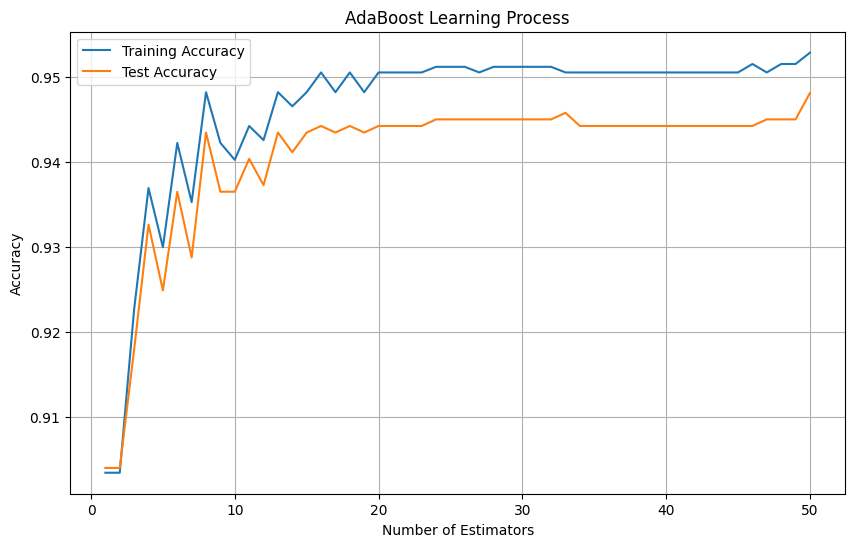

In [17]:
train_accuracies = []
test_accuracies = []

for train_pred, test_pred in zip(ada_boost.staged_predict(X_train), ada_boost.staged_predict(X_test)):
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Learning Process')
plt.legend()
plt.grid()
plt.show()

In [10]:
greadient_boost_cf = GradientBoostingClassifier(n_estimators=100)
greadient_boost_cf.fit(X_train, y_train)
predicted_x_test = greadient_boost_cf.predict(X_test)

greadient_boost_cf_score = accuracy_score(y_test, predict_x_test)


print("Accuracy fro Gradient Boosting - ", greadient_boost_cf_score)
greadient_boost_report = classification_report(y_test, predict_x_test)
print(greadient_boost_report)




Accuracy fro Gradient Boosting -  0.9481022463206816
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       919
           1       0.92      0.89      0.91       372

    accuracy                           0.95      1291
   macro avg       0.94      0.93      0.94      1291
weighted avg       0.95      0.95      0.95      1291



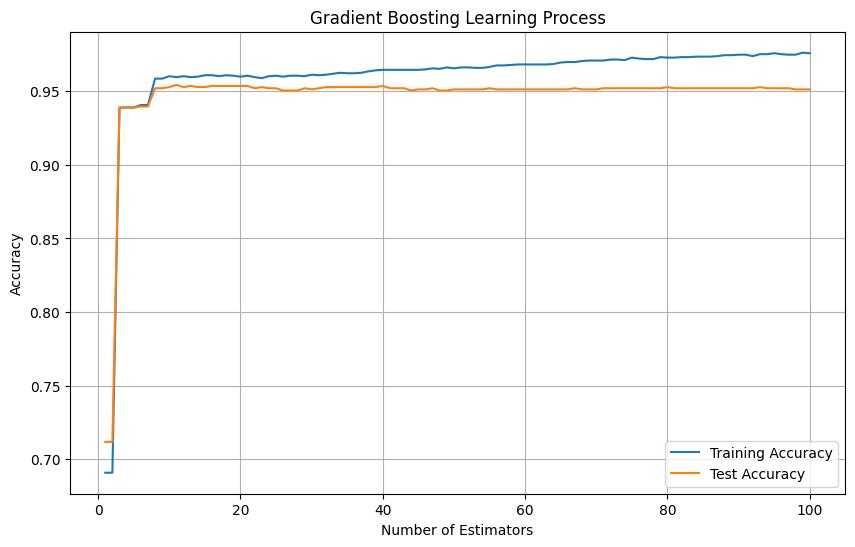

In [16]:
train_accuracies = []
test_accuracies = []

for train_pred, test_pred in zip(greadient_boost_cf.staged_predict(X_train), greadient_boost_cf.staged_predict(X_test)):
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Learning Process')
plt.legend()
plt.grid()
plt.show()

In [19]:
xg_boost_cf = xgb.XGBClassifier( eval_metric='logloss')
xg_boost_cf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

predicted_x_test = xg_boost_cf.predict(X_test)

xg_boost_cf_score = accuracy_score(y_test, predict_x_test)

print("Accuracy fro XGBoost Boosting - ", xg_boost_cf_score)
xg_boost_report = classification_report(y_test, predict_x_test)
print(xg_boost_report)



Accuracy fro XGBoost Boosting -  0.9481022463206816
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       919
           1       0.92      0.89      0.91       372

    accuracy                           0.95      1291
   macro avg       0.94      0.93      0.94      1291
weighted avg       0.95      0.95      0.95      1291



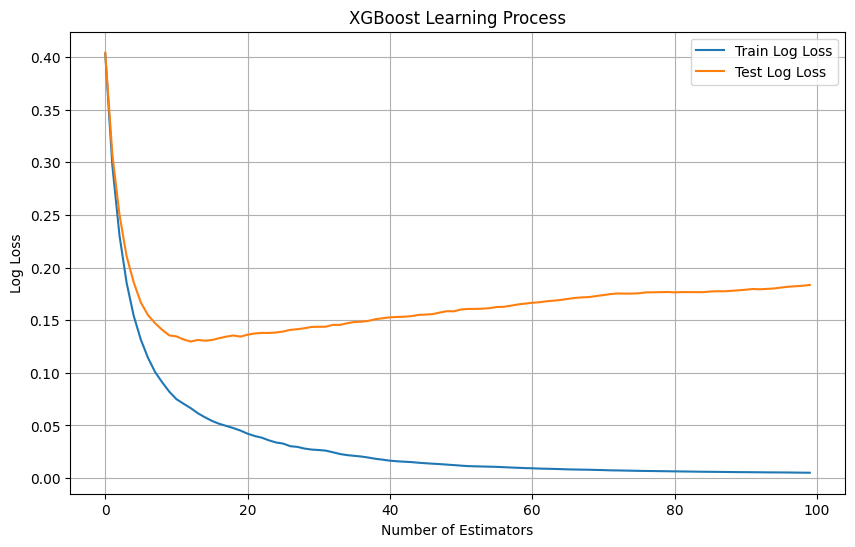

In [21]:
results = xg_boost_cf.evals_result()

plt.figure(figsize=(10, 6))
plt.plot(results['validation_0']['logloss'], label='Train Log Loss')
plt.plot(results['validation_1']['logloss'], label='Test Log Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Log Loss')
plt.title('XGBoost Learning Process')
plt.legend()
plt.grid()
plt.show()

In [35]:


# Define the models
ada_boost = AdaBoostClassifier(random_state=42)
gradient_boost_cf = GradientBoostingClassifier(random_state=42)
xg_boost_cf = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

params = {
    "ada_boost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "gradient_boost_cf": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "xg_boost_cf": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0]
    }
}

model_instances = {
    "ada_boost": ada_boost,
    "gradient_boost_cf": gradient_boost_cf,
    "xg_boost_cf": xg_boost_cf
}

def tune_boosting(params, model_instances):
    tuned_boosting_models = []
    for model_name, boosting_model in model_instances.items():
        boosting_model_params = params[model_name]
        grid_search_boost_model = GridSearchCV(boosting_model, boosting_model_params, cv=5, scoring='accuracy')
        grid_search_boost_model.fit(X_train, y_train)
        tuned_boosting_models.append(grid_search_boost_model)
    return tuned_boosting_models

tuned_models = tune_boosting(params, model_instances)





Accuracy for optimized AdaBoostClassifier:  0.9512006196746708
Accuracy for optimized GradientBoostingClassifier:  0.9512006196746708
Accuracy for optimized XGBClassifier:  0.9504260263361735


Accuracy for optimized AdaBoostClassifier:  0.9512006196746708


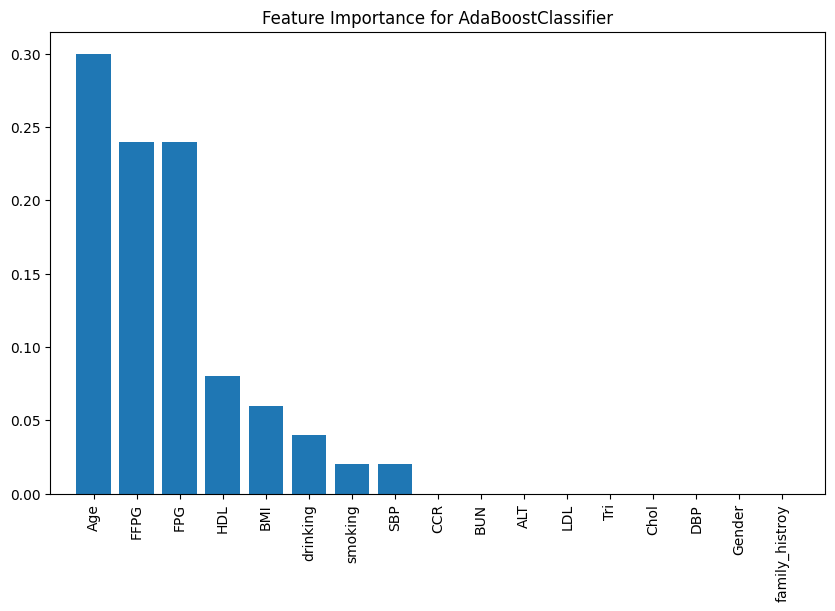

Accuracy for optimized GradientBoostingClassifier:  0.9512006196746708


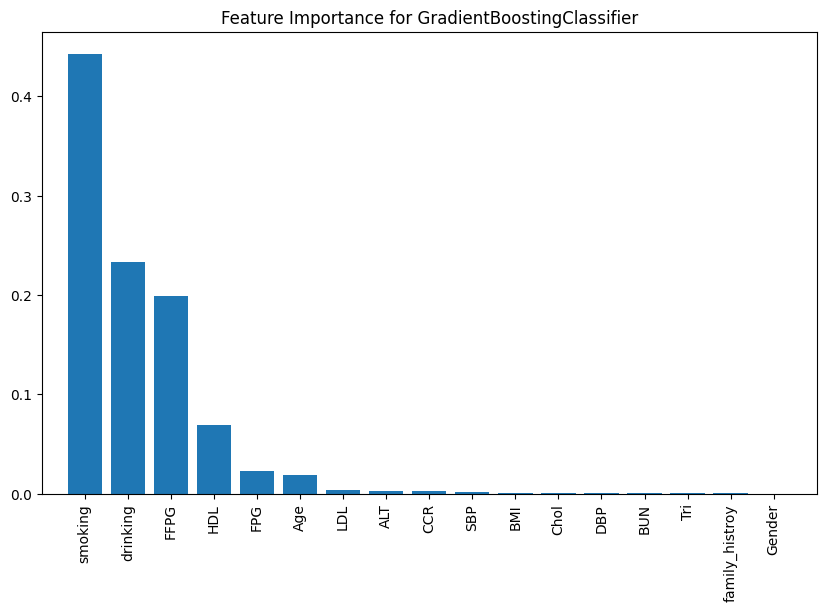

Accuracy for optimized XGBClassifier:  0.9504260263361735


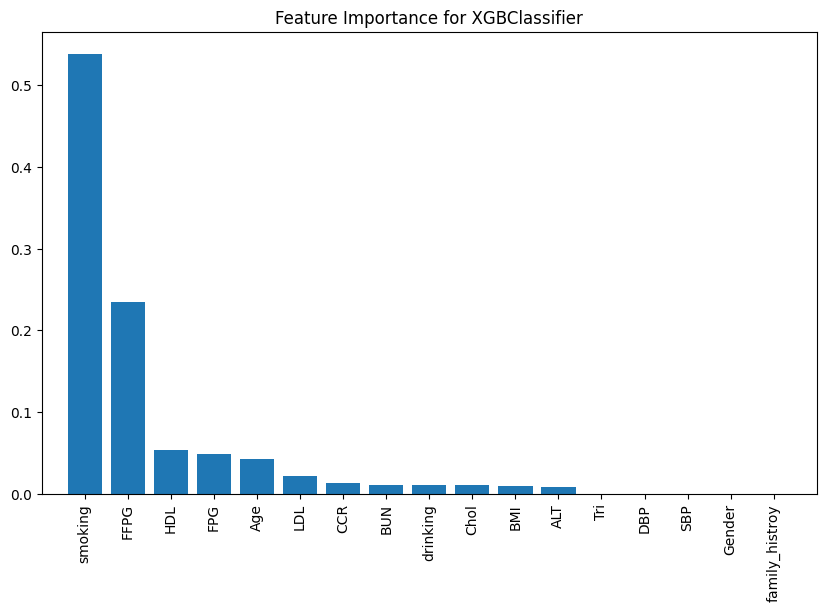

In [46]:
def predict_boosting_score(tuned_models):
    for model in tuned_models:
        best_boost = model.best_estimator_
        predicted_test = best_boost.predict(X_test)
        print(f"Accuracy for optimized {best_boost.__class__.__name__}: ", accuracy_score(y_test, predicted_test))
        plot_feature_importance(best_boost, X_train.columns, f"Feature Importance for {best_boost.__class__.__name__}")

def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_  
    indices = np.argsort(importance)[::-1]  

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importance)), importance[indices], align='center')
    plt.xticks(range(len(importance)), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, len(importance)])
    plt.show()


predict_boosting_score(tuned_models)

In [33]:
gradient_boost_reg = GradientBoostingClassifier(random_state=42)

param_grid_gb_reg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

grid_search_gb_reg = GridSearchCV(greadient_boost_cf, param_grid_gb_reg, cv=5, scoring='accuracy')
grid_search_gb_reg.fit(X_train, y_train)

print("Best parameters for Gradient Boosting with regularization: ", grid_search_gb_reg.best_params_)



Best parameters for Gradient Boosting with regularization:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:

best_gb_reg = grid_search_gb_reg.best_estimator_
predicted_gb_reg_test = best_gb_reg.predict(X_test)
print("Accuracy for Gradient Boosting with regularization: ", accuracy_score(y_test, predicted_gb_reg_test))

gb_report = classification_report(y_test, predicted_gb_reg_test)

Accuracy for Gradient Boosting with regularization:  0.9527498063516654


In [36]:


param_grid_xgb_reg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'alpha': [1, 5, 10],  
    'lambda': [1, 3, 7] 
}

grid_search_xgb_reg = GridSearchCV(xg_boost_cf, param_grid_xgb_reg, cv=5, scoring='accuracy')
grid_search_xgb_reg.fit(X_train, y_train)

print("Best parameters for XGBoost with regularization: ", grid_search_xgb_reg.best_params_)




Best parameters for XGBoost with regularization:  {'alpha': 10, 'lambda': 3, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


In [40]:

best_xgb_reg = grid_search_xgb_reg.best_estimator_
predicted_xgb_reg_test = best_xgb_reg.predict(X_test)
print("Accuracy for XGBoost with regularization: ", accuracy_score(y_test, predicted_xgb_reg_test))

xb_boost_report = classification_report(y_test, predicted_xgb_reg_test)

Accuracy for XGBoost with regularization:  0.9527498063516654


In [42]:
print("Ada Boost Metrics")
print(ada_boosting_report)

print("Gradient Boost Metrics")
print(xb_boost_report)

print("XGBoost Metrics")
print(gb_report)

Ada Boost Metrics
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       919
           1       0.92      0.89      0.91       372

    accuracy                           0.95      1291
   macro avg       0.94      0.93      0.94      1291
weighted avg       0.95      0.95      0.95      1291

Gradient Boost Metrics
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       919
           1       0.95      0.89      0.92       372

    accuracy                           0.95      1291
   macro avg       0.95      0.93      0.94      1291
weighted avg       0.95      0.95      0.95      1291

XGBoost Metrics
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       919
           1       0.95      0.88      0.91       372

    accuracy                           0.95      1291
   macro avg       0.95      0.93      0.94      1291
weighted avg     

In [51]:
n_estimators = [10, 50, 100, 200, 300]

ada_performance = []
gradient_performance = []  
xgboost_performance = []  


for n_estimator in n_estimators:
    ada_boost_cf = AdaBoostClassifier(n_estimators=n_estimator, algorithm="SAMME", random_state=42)
    ada_boost_cf.fit(X_train, y_train)
    predicted_x_test = ada_boost_cf.predict(X_test)
    ada_performance.append(accuracy_score(y_test, predicted_x_test))

    greadient_boost_cf = GradientBoostingClassifier(n_estimators=n_estimator)
    greadient_boost_cf.fit(X_train, y_train)
    predicted_x_test = greadient_boost_cf.predict(X_test)
    gradient_performance.append(accuracy_score(y_test, predicted_x_test))

    xg_boost_cf = xgb.XGBClassifier( eval_metric='logloss', n_estimators=n_estimator)
    xg_boost_cf.fit(X_train, y_train, verbose=False)
    predicted_x_test = xg_boost_cf.predict(X_test)

    xgboost_performance.append(accuracy_score(y_test, predicted_x_test))



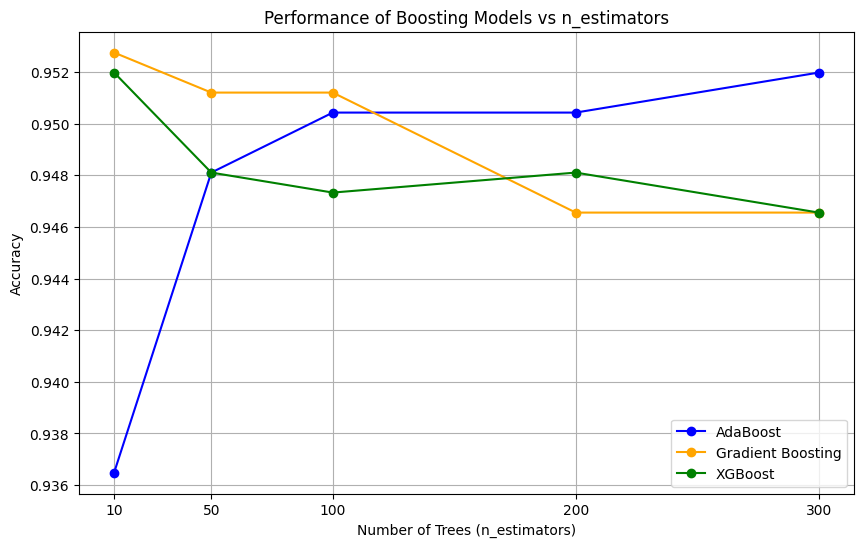

In [53]:
plt.figure(figsize=(10, 6))

plt.plot(n_estimators, ada_performance, marker='o', label='AdaBoost', color='blue')
plt.plot(n_estimators, gradient_performance, marker='o', label='Gradient Boosting', color='orange')
plt.plot(n_estimators, xgboost_performance, marker='o', label='XGBoost', color='green')

plt.title('Performance of Boosting Models vs n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(n_estimators)
plt.grid()
plt.legend()
plt.show()


XGBoost з регуляризацією показав трошки кращі результати 0,9527 в той час як без регуляризація 0,9496.
У випадку з Gradient Boost результат також покращився трошки було 0.9512, стало 0.9527 

Для вирішення задачі класифікації хворих пацієнтів найкраще показали себе дві моделі XGBoost та Gradient Boost.
Але все ж таки XGBoost краще працює з більш склданими даними. Також XGBoost навчається швидше на великих наборах даних. Також регуляризація в XGBoost допомагає зменшити ризик перенавчання, що може бути важливим у випадках з обмеженим набором даних.

Вплив регуляризації на результати моделей був позитивний, але незначний, можливо якщо б дані були складніші то результат був б помітнішими. Для покращення результатів можна розширити вибірку параметрів для регуляризації і експерементувати з різними значеннями.